# ThinkorSwim Python API
by Chee-Foong on 28 Jun 2020  


A simple notebook to demostrate how to extract data from [ThinkorSwim API](https://developer.tdameritrade.com/apis).

---
## Summary

Below shows the sample Python code to submit TOS api requests to retrieve historical stock prices and stock quotes. 

### Important Note  
You will need to register as a TOS api developer.  See [https://developer.tdameritrade.com/](https://developer.tdameritrade.com/).  

After which, you will need to create your own app to obtain your **Client ID**.  See video [https://www.youtube.com/watch?v=mLjtVVqp5iw](https://www.youtube.com/watch?v=mLjtVVqp5iw).
  
---
## Import the libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta

import sys  
sys.path.append('../src') 

from config import *

**client_id** imported from from the config.py file stored in subdirectory **src**.  This client id stores the thinkorswim application client id to be submitted together with the end point.  Register with tos as a developer to get a client id.

---
## Market Hours
https://developer.tdameritrade.com/market-hours/apis

In [36]:
market = 'OPTION'
mkt_hours_endpoint = 'https://api.tdameritrade.com/v1/marketdata/{}/hours'.format(market)

payload = {}
payload['apikey'] = client_id
content = requests.get(url = mkt_hours_endpoint, params = payload)
data = content.json()

In [37]:
data

{'option': {'option': {'date': '2020-06-27',
   'marketType': 'OPTION',
   'exchange': None,
   'category': None,
   'product': 'option',
   'productName': None,
   'isOpen': False,
   'sessionHours': None}}}

---
## Price History
https://developer.tdameritrade.com/price-history/apis

In [8]:
symbol = 'AAPL'
endpoint = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbol)

payload = {}
payload['apikey'] = client_id
payload['periodType'] = 'year'
payload['period'] = '1',
payload['frequencyType'] = 'daily'

content = requests.get(url = endpoint, params = payload)
data = content.json()

In [9]:
pricedata = pd.DataFrame(data['candles'])
pricedata.datetime = pd.to_datetime(pricedata['datetime'], unit='ms')
pricedata.set_index('datetime', inplace=True)
pricedata

,open,high,low,close,volume
datetime,,,,,
2019-06-26 05:00:00,197.77,200.9900,197.3500,199.80,26067512
2019-06-27 05:00:00,200.29,201.5700,199.5700,199.74,20899717
2019-06-28 05:00:00,198.68,199.4950,197.0500,197.92,31110642
2019-07-01 05:00:00,203.17,204.4900,200.6500,201.55,27316739
2019-07-02 05:00:00,201.41,203.1323,201.3600,202.73,16935217
...,...,...,...,...,...
2020-06-22 05:00:00,351.34,359.4600,351.1500,358.87,33861316
2020-06-23 05:00:00,364.00,372.3800,362.2701,366.53,53038869
2020-06-24 05:00:00,365.00,368.7900,358.5200,360.06,48155849


---
## Instruments
https://developer.tdameritrade.com/instruments/apis

In [10]:
search_endpoint = 'https://api.tdameritrade.com/v1/instruments'

payload = {}
payload['apikey'] = client_id
payload['symbol'] = 'AAPL'
payload['projection'] = 'fundamental'

content = requests.get(url = search_endpoint, params = payload)
data = content.json()
data

{'AAPL': {'fundamental': {'symbol': 'AAPL',
   'high52': 372.38,
   'low52': 192.58,
   'dividendAmount': 3.28,
   'dividendYield': 0.93,
   'dividendDate': '2020-05-08 00:00:00.000',
   'peRatio': 27.72264,
   'pegRatio': 2.970602,
   'pbRatio': 19.4975,
   'prRatio': 5.71963,
   'pcfRatio': 22.23666,
   'grossMarginTTM': 38.10979,
   'grossMarginMRQ': 38.36194,
   'netProfitMarginTTM': 21.35039,
   'netProfitMarginMRQ': 19.29072,
   'operatingMarginTTM': 24.47599,
   'operatingMarginMRQ': 22.0414,
   'returnOnEquity': 62.09404,
   'returnOnAssets': 17.27511,
   'returnOnInvestment': 24.21635,
   'quickRatio': 1.46127,
   'currentRatio': 1.49596,
   'interestCoverage': 0.0,
   'totalDebtToCapital': 58.41288,
   'ltDebtToEquity': 114.3959,
   'totalDebtToEquity': 140.459,
   'epsTTM': 12.756,
   'epsChangePercentTTM': 9.33233,
   'epsChangeYear': 3.83907,
   'epsChange': 0.0,
   'revChangeYear': 0.0,
   'revChangeTTM': 3.67171,
   'revChangeIn': 0.0,
   'sharesOutstanding': 4334335000.

---
## Quotes
https://developer.tdameritrade.com/quotes/apis

Get quote for one or more symbols

In [18]:
quotes_endpoint = 'https://api.tdameritrade.com/v1/marketdata/quotes'

payload = {}
payload['apikey'] = client_id
payload['symbol'] = 'AAPL,MSFT'

content = requests.get(url = quotes_endpoint, params = payload)
data = content.json()
data

{'AAPL': {'assetType': 'EQUITY',
  'assetMainType': 'EQUITY',
  'cusip': '037833100',
  'symbol': 'AAPL',
  'description': 'Apple Inc. - Common Stock',
  'bidPrice': 365.22,
  'bidSize': 400,
  'bidId': 'Q',
  'askPrice': 365.35,
  'askSize': 700,
  'askId': 'K',
  'lastPrice': 365.23,
  'lastSize': 0,
  'lastId': 'Q',
  'openPrice': 0.0,
  'highPrice': 0.0,
  'lowPrice': 0.0,
  'bidTick': ' ',
  'closePrice': 366.53,
  'netChange': -1.3,
  'totalVolume': 487845,
  'quoteTimeInLong': 1593004545185,
  'tradeTimeInLong': 1593004548387,
  'mark': 365.35,
  'exchange': 'q',
  'exchangeName': 'NASD',
  'marginable': True,
  'shortable': True,
  'volatility': 0.0272,
  'digits': 4,
  '52WkHigh': 372.38,
  '52WkLow': 192.58,
  'nAV': 0.0,
  'peRatio': 28.1334,
  'divAmount': 3.28,
  'divYield': 0.89,
  'divDate': '2020-05-08 00:00:00.000',
  'securityStatus': 'Normal',
  'regularMarketLastPrice': 366.53,
  'regularMarketLastSize': 17698,
  'regularMarketNetChange': 0.0,
  'regularMarketTradeT

Retrieving symbol's volatility from quotes and consolidate them into a DataFrame.  Note TOS has not got back to my question how this voliatility number is calculated.  TOS is currently not providing a data dictionary or documentation for their apis.

In [22]:
quotes_endpoint = 'https://api.tdameritrade.com/v1/marketdata/quotes'

payload = {}
payload['apikey'] = client_id
payload['symbol'] = dowjones

content = requests.get(url = quotes_endpoint, params = payload)
data = content.json()

vols = []

for k, v in data.items():
    vol = {}
    vol['symbol'] = k
    vol['volatility'] = v['volatility']
    vols.append(vol)
    
vols = pd.DataFrame(vols)
vols

,symbol,volatility
0,AAPL,0.067784
1,AXP,0.268253
2,BA,0.146385
3,CAT,0.243014
4,CSCO,0.117541
5,CVX,0.197584
6,DIS,0.180278
7,DOW,0.207680
8,GS,0.169461
9,HD,0.220660


Get quote for a symbol

In [11]:
symbol = 'MSFT'
quotes_endpoint = 'https://api.tdameritrade.com/v1/marketdata/{}/quotes'.format(symbol)

payload = {}
payload['apikey'] = client_id

content = requests.get(url = quotes_endpoint, params = payload)
data = content.json()
data

{'MSFT': {'assetType': 'EQUITY',
  'assetMainType': 'EQUITY',
  'cusip': '594918104',
  'symbol': 'MSFT',
  'description': 'Microsoft Corporation - Common Stock',
  'bidPrice': 196.05,
  'bidSize': 100,
  'bidId': 'K',
  'askPrice': 196.2,
  'askSize': 600,
  'askId': 'Q',
  'lastPrice': 196.21,
  'lastSize': 0,
  'lastId': 'D',
  'openPrice': 199.73,
  'highPrice': 199.89,
  'lowPrice': 194.88,
  'bidTick': ' ',
  'closePrice': 196.33,
  'netChange': -0.12,
  'totalVolume': 54675780,
  'quoteTimeInLong': 1593215990973,
  'tradeTimeInLong': 1593215978934,
  'mark': 196.33,
  'exchange': 'q',
  'exchangeName': 'NASD',
  'marginable': True,
  'shortable': True,
  'volatility': 0.0142,
  'digits': 4,
  '52WkHigh': 203.95,
  '52WkLow': 130.78,
  'nAV': 0.0,
  'peRatio': 35.3383,
  'divAmount': 2.04,
  'divYield': 1.04,
  'divDate': '2020-08-19 00:00:00.000',
  'securityStatus': 'Normal',
  'regularMarketLastPrice': 196.33,
  'regularMarketLastSize': 104364,
  'regularMarketNetChange': 0.0,

---
## Getting Option Prices from the Option Chains api
https://developer.tdameritrade.com/option-chains/apis

1. **getOptionPrice**: Function to retrieve option prices accross all strikes for one symbol
2. **processOptionPrice**: Function to consolidate all option prices for all symbols into a DataFrame

In [15]:
def getOptionPrice(symbol, apikey, start, end, strikeCount=10, interval=2.5):

    options_endpoint = 'https://api.tdameritrade.com/v1/marketdata/chains'

    payload = {}
    payload['apikey'] = apikey
    payload['symbol'] = symbol
    payload['contractType'] = 'ALL'
    payload['range'] = 'ALL'
    payload['strategy'] = 'SINGLE'
    payload['includeQuotes'] = ' TRUE'
    payload['strikeCount'] = strikeCount
    payload['interval'] = interval
    payload['fromDate'] = start
    payload['toDate'] = end
    payload['optionType'] = 'S'
    # payload['volatility'] = '0.46'
    # payload['underlyingPrice'] = '350'
    # payload['interestRate'] = '0.01'
    # payload['daysToExpiration'] = '30'

    content = requests.get(url = options_endpoint, params = payload)
    data = content.json()
    return data

In [16]:
def processOptionPrice(data):

    interested = ['datetimestamp','underlyingSymbol','underlyingPrice','underlyingVol',
                  'putCall','strikePrice','expirationType','inTheMoney',
                  'lastTradingDay','expirationDate','daysToExpiration',
                  'openInterest','theoreticalVolatility','volatility',
                  'theoreticalOptionValue','closePrice','last','mark','bid','ask']

    if data['status'] == 'SUCCESS':
        call_list = data['callExpDateMap']
        put_list = data['putExpDateMap']
        # data.pop('callExpDateMap', None)
        # data.pop('putExpDateMap', None)

        options = []

        for k1, v1 in call_list.items():
            for k2, v2 in v1.items():
                options += v2

        for k1, v1 in put_list.items():
            for k2, v2 in v1.items():
                options += v2        

        options = pd.DataFrame(options)
        options['datetimestamp'] = datetime.datetime.utcnow()
        options['underlyingPrice'] = data['underlyingPrice']
        options['underlyingSymbol'] = data['symbol']
        options['underlyingVol'] = data['volatility']
        options.expirationDate = pd.to_datetime(options['expirationDate'], unit='ms')
        options.lastTradingDay = pd.to_datetime(options['lastTradingDay'], unit='ms')       
        return options[interested]

    else:
        return pd.DataFrame(columns = [interested])

Retrieve options that are still active and not expired in 3 months

In [17]:
utc_today = datetime.datetime.utcnow()
utc_3mth = utc_today + relativedelta(months=+3)

List of symbols to retrieve option prices

In [18]:
dowjones = ['AAPL','AXP','BA','CAT','CSCO','CVX','DIS','DOW',
            'GS','HD','IBM','INTC','JNJ','JPM','KO','MCD','MMM',
            'MRK','MSFT','NKE','PFE','PG','RTX','TRV','UNH','V','VZ','WBA','WMT','XOM']

In [19]:
from tqdm.notebook import tqdm as tqdm

option_pxtable = []

for symbol in tqdm(dowjones):
    option_px = getOptionPrice(symbol, client_id, utc_today, utc_3mth, 20, 2.5)
    option_px = processOptionPrice(option_px)
    if option_px.shape[0] > 1:
        option_pxtable.append(option_px)
    else:
        print('{} returns no results'.format(symbol))
    
option_pxtable = pd.concat(option_pxtable)
option_pxtable.reset_index(inplace=True, drop=True)  

Option price table

In [20]:
option_pxtable

,datetimestamp,underlyingSymbol,underlyingPrice,underlyingVol,putCall,strikePrice,expirationType,inTheMoney,lastTradingDay,expirationDate,daysToExpiration,openInterest,theoreticalVolatility,volatility,theoreticalOptionValue,closePrice,last,mark,bid,ask
0,2020-06-27 16:25:49.981917,AAPL,353.700,29.0,CALL,330.0,S,True,2020-07-03,2020-07-02 20:00:00,5,655,29.0,45.997,24.825,25.58,25.17,24.83,24.25,25.40
1,2020-06-27 16:25:49.981917,AAPL,353.700,29.0,CALL,332.5,S,True,2020-07-03,2020-07-02 20:00:00,5,230,29.0,36.345,21.825,23.25,23.00,21.83,20.45,23.20
2,2020-06-27 16:25:49.981917,AAPL,353.700,29.0,CALL,335.0,S,True,2020-07-03,2020-07-02 20:00:00,5,641,29.0,42.517,20.225,20.93,21.04,20.23,19.60,20.85
3,2020-06-27 16:25:49.981917,AAPL,353.700,29.0,CALL,337.5,S,True,2020-07-03,2020-07-02 20:00:00,5,855,29.0,38.793,17.750,18.83,18.20,17.75,16.90,18.60
4,2020-06-27 16:25:49.981917,AAPL,353.700,29.0,CALL,340.0,S,True,2020-07-03,2020-07-02 20:00:00,5,1840,29.0,35.796,15.375,16.76,16.25,15.38,14.25,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,2020-06-27 16:26:33.194125,XOM,43.615,29.0,PUT,57.5,R,True,2020-09-19,2020-09-18 20:00:00,83,1927,29.0,5.000,14.665,15.05,13.95,14.63,14.20,15.05
9092,2020-06-27 16:26:33.194125,XOM,43.615,29.0,PUT,60.0,R,True,2020-09-19,2020-09-18 20:00:00,83,6321,29.0,5.000,17.164,17.44,16.25,17.10,16.40,17.80
9093,2020-06-27 16:26:33.194125,XOM,43.615,29.0,PUT,62.5,R,True,2020-09-19,2020-09-18 20:00:00,83,1682,29.0,37.652,19.725,19.85,19.00,19.73,18.85,20.60
9094,2020-06-27 16:26:33.194125,XOM,43.615,29.0,PUT,65.0,R,True,2020-09-19,2020-09-18 20:00:00,83,1926,29.0,5.000,22.163,22.32,22.05,21.98,21.15,22.80


---
## Calculating the annualised volatility of symbols based on Price History

1. **getVolatility**: Function to retrieve symbol past 1 year price history and calculate annualised volatility from daily returns

In [23]:
def getVolatility(symbol):

    endpoint = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbol)

    payload = {}
    payload['apikey'] = client_id
    payload['periodType'] = 'year'
    payload['period'] = '1',
    payload['frequencyType'] = 'daily'

    content = requests.get(url = endpoint, params = payload)
    data = content.json()

    pricedata = pd.DataFrame(data['candles'])
    pricedata.datetime = pd.to_datetime(pricedata['datetime'], unit='ms')
    pricedata.set_index('datetime', inplace=True)
    pricedata

    pricedata['dailyreturn'] = pricedata.close.pct_change()
    pricedata.dropna(inplace=True)
    
    return pricedata.dailyreturn.std()* np.sqrt(252)

In [24]:
from tqdm.notebook import tqdm as tqdm

symbols = dowjones
vols = []

for symbol in tqdm(symbols):
    vol = {}
    vol['symbol'] = symbol
    vol['volatility'] = getVolatility(symbol)
    vols.append(vol)
    
vols = pd.DataFrame(vols).set_index('symbol')
vols

,volatility
symbol,
AAPL,0.404618
AXP,0.582692
BA,0.810362
CAT,0.430401
CSCO,0.416648
CVX,0.558274
DIS,0.438666
DOW,0.606470
GS,0.502024


Update the underlyingVol by performing a vlookup

In [79]:
option_pxtable['underlyingVol'] = option_pxtable.underlyingSymbol.map(vols.volatility)

In [80]:
option_pxtable

,datetimestamp,underlyingSymbol,underlyingPrice,underlyingVol,putCall,strikePrice,expirationType,inTheMoney,lastTradingDay,expirationDate,...,theoreticalVolatility,volatility,theoreticalOptionValue,closePrice,last,mark,bid,ask,bidaskspread,underlyingVol2
0,2020-06-24 14:26:51.408779,AAPL,365.055,0.404229,CALL,342.5,S,True,2020-06-27,2020-06-26 20:00:00,...,29.0,48.907,23.025,24.36,22.46,23.03,22.80,23.25,0.45,0.404229
1,2020-06-24 14:26:51.408779,AAPL,365.055,0.404229,CALL,345.0,S,True,2020-06-27,2020-06-26 20:00:00,...,29.0,44.389,20.525,21.97,19.15,20.53,20.40,20.65,0.25,0.404229
2,2020-06-24 14:26:51.408779,AAPL,365.055,0.404229,CALL,347.5,S,True,2020-06-27,2020-06-26 20:00:00,...,29.0,43.847,18.250,19.60,17.48,18.25,18.00,18.50,0.50,0.404229
3,2020-06-24 14:26:51.408779,AAPL,365.055,0.404229,CALL,350.0,S,True,2020-06-27,2020-06-26 20:00:00,...,29.0,39.067,15.750,17.22,15.60,15.75,15.55,15.95,0.40,0.404229
4,2020-06-24 14:26:51.408779,AAPL,365.055,0.404229,CALL,352.5,S,True,2020-06-27,2020-06-26 20:00:00,...,29.0,37.956,13.525,14.85,13.80,13.53,13.40,13.65,0.25,0.404229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9071,2020-06-24 14:27:38.000409,XOM,45.725,0.460163,PUT,60.0,R,True,2020-09-19,2020-09-18 20:00:00,...,29.0,38.783,15.350,14.44,14.95,15.35,15.20,15.50,0.30,0.460163
9072,2020-06-24 14:27:38.000409,XOM,45.725,0.460163,PUT,62.5,R,True,2020-09-19,2020-09-18 20:00:00,...,29.0,27.983,17.600,16.81,16.40,17.60,17.35,17.85,0.50,0.460163
9073,2020-06-24 14:27:38.000409,XOM,45.725,0.460163,PUT,65.0,R,True,2020-09-19,2020-09-18 20:00:00,...,29.0,5.000,20.081,19.23,18.93,20.05,19.90,20.20,0.30,0.460163
9074,2020-06-24 14:27:38.000409,XOM,45.725,0.460163,PUT,67.5,R,True,2020-09-19,2020-09-18 20:00:00,...,29.0,5.000,22.580,21.68,21.22,22.50,22.35,22.65,0.30,0.460163


## Backup Option Price Table

In [25]:
def getTimeStamp():
    out = datetime.datetime.now().strftime("%Y%m%d%I%M%S%f")
    return out

Save the option price with time stamp

In [26]:
option_pxtable.to_csv('../data/option_price_' + getTimeStamp() +'.csv', index=False, header=True)

## Sample Analysis

Plotting the implied volatility against strike price for a symbol

In [33]:
option_plot = option_pxtable[(option_pxtable.underlyingSymbol == 'AAPL')]

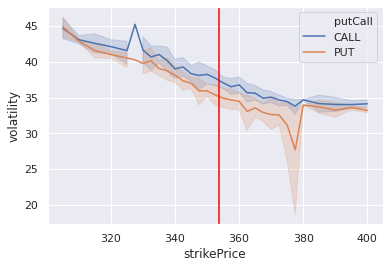

In [35]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

sns.lineplot(x='strikePrice', y='volatility', hue='putCall', data=option_plot)
plt.axvline(option_plot.underlyingPrice.iloc[0], color='red')
plt.show()